# Upper Confidence Bound

Imagine as 5 máquinas caça-níquel com a seguinte destribuição de resultados:

![](rl-01.png)

Sabemos que a melhor é **D5**. Mas como descobrir isso?

O primeiro passo é criar uma área de confiança para todas as distrubuições:

![](rl-02.png)

O retangulo é a área de confiança, o tracejado vermelho é o ponto ideal, e as linhas coloridas é o resultado da distribuição (no caso, não sabemos previamente esse valor, vamos descobrir).

O próximo passo é pegar a distribuição com a confiança mais alta (no caso, todos tem o mesmo valor, então pega qualquer uma) e aplica uma rodada de valor. No caso, pegamos o **D3** e o valor foi negativo (não clicamos no banner ou não ganhamos na máquina caça níquel, por exemplo). Então colocamos uma punição, baixando seu nível de confiança e diminuimos o tamanho da caixa, pois já sabemos o resultado de uma distribuição:

![](rl-03.png)

O próximo passo é executar o mesmo processo. Temos 4 distribuições com o mesmo valor de confiança. Pegamos qq uma. Repetimos esse processo até o tamanho da caixa ser pequeno.

![](rl-04.png)

Pronto, achamos a melhor distribuição: **D5**

## Python


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


O dataset são 10 banners (colunas) e 1000 usuários. Cada vez que o banner é exibido e o usuário clica, então o valor fica 1, senão fica 0.

Foi criado um algoritmo `random_selection.py`, onde é executado um loop de 10000, onde para cada rodada, é selecionado um banner (1 a 10) e é exibido para um usuário. Uma pontuação positiva é dada caso o usuário clique nesse banner (dataset acima) e no final é computado a recompensa final. Isso mostra os banners aleatoriamente, e da um total reward em torno de 1200. Vamos ver abaixo qual o resultado do UCB

Não existe nada pronto em python, então vamos implementar na mão. O algoritmo está abaixo:

![](rl-05.png)

In [5]:
import math
# Implementing UCB
N = 10000 # Quantidae de rodadas
d = 10
ads_selected = []


number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

# para cada rodada
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    # Para cada ad
    for i in range(0, d):
        if (number_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n)/number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound # Guardar o maior upper bound
            ad = i # Guardar qual ad tem o maior upper bound
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    
    total_reward = total_reward + reward

In [6]:
total_reward

2211

In [7]:
max_upper_bound

0.3152678044697057

In [8]:
ad

4

In [12]:
# Verifique que no final do algoritmo, o ad 4 é mostrado mais
ads_selected[9000:9999]

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 7,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 9,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 8,
 4,
 0,
 7,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 7,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


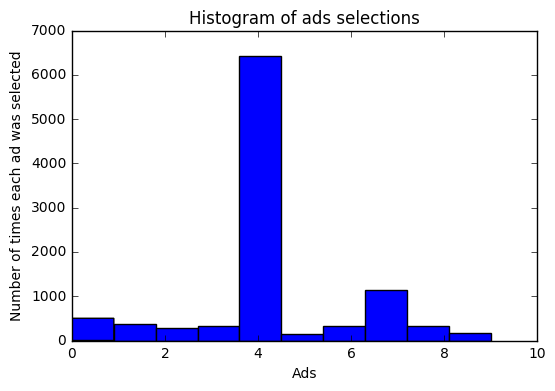

In [14]:
# Visualising th results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()